In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import anndata as ad
# ログなどのパラメータ設定
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, frameon=False) 
import os
os.getcwd()
os.chdir("/data/liuw/Projects/FAST/FAST_GPB_R1/RealData/DLPFC12")

In [4]:
ID = 'DLPFC12'
dir_data = '/data/liuw/Projects/FAST/FAST_GPB_R1/RealData/DLPFC12/PAGA_csv/'
dir_out = '/data/liuw/Projects/FAST/FAST_GPB_R1/RealData/DLPFC12/PAGA_figs/'

In [38]:
ii = 1
data = pd.read_csv(dir_data+'FASTP_unaligned_embed'+str(ii)+'.csv', index_col=0) 
#data = pd.read_csv(dir_data+'FASTP_aligned_embed'+str(ii)+'.csv', index_col=0) 
# 显示数据的前几行
print(data.head())
#adata = sc.datasets.paul15()
data.shape
data_matrix = data.values
cells = pd.DataFrame(index=[f"cell_{i}" for i in range(data_matrix.shape[0])])
genes = pd.DataFrame(index=[f"gene_{i}" for i in range(data_matrix.shape[1])])
 
# 创建AnnData对象
adata = ad.AnnData(data_matrix, obs=cells, var=genes)
adata.obsm['X_FASTP'] = data_matrix 
# 显示AnnData对象的信息
data_cluster =  pd.read_csv(dir_data+'FASTP_domain_rename'+str(ii)+'.csv', index_col=0) 
adata.obs["Domain"] = data_cluster['Domain'].values
data_cluster.head()

          V1         V2        V3        V4        V5        V6        V7   
1  15.837262  -3.107290 -0.401135  3.827705  4.614909 -0.850809 -0.293613  \
2 -16.132612  -1.738314 -0.951781 -0.364284  1.646213  1.048696  6.029611   
3  10.595510   1.641913  3.778189  3.963600 -3.322641  4.996960 -8.533446   
4   2.544561  24.969883  0.284532 -0.504848 -0.000934  1.275036  0.474088   
5  -5.462448   1.342024 -3.840443 -1.889966  3.123404 -4.683765  0.135452   

         V8        V9       V10       V11       V12       V13       V14   
1  0.423490 -2.120374  0.637971  2.174347  1.371902 -1.714208  1.939860  \
2  1.461387  1.920595 -0.487139  0.327274 -1.191640  0.726452 -0.271942   
3 -3.421121 -1.491696 -2.818853  2.649677  0.448593 -3.076980  1.156195   
4 -0.412685  1.686901 -0.829600  2.648508 -0.306951 -2.012626 -2.895916   
5 -0.765968  6.086422  0.589857  3.547738 -3.799757  0.124421 -1.734932   

        V15  
1  0.720655  
2 -1.357665  
3 -0.037697  
4  1.524116  
5  0.821463  


,Domain
1,Layer2/3
2,Layer3/4
3,Layer1
4,Lyaer6/WM
5,Lyaer6/WM


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


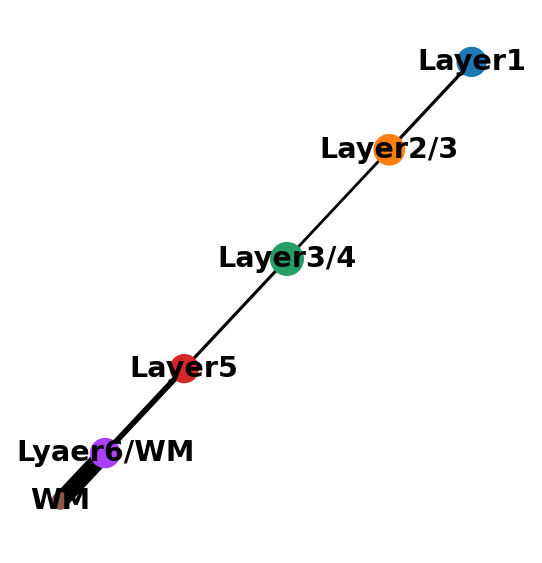

In [42]:

sc.pp.neighbors(adata, n_neighbors=10, use_rep="X_FASTP")
sc.tl.paga(adata, groups="Domain")
#sc.pl.paga(adata, color=["Domain"], save='tmp')

In [46]:
import scanpy as sc
import matplotlib.pyplot as plt

# 假设 adata 是你的 AnnData 对象
# 请确保 adata 已经经过 PAGA 所需的预处理步骤

# 创建一个新的图形对象
fig, ax = plt.subplots(figsize=(8, 4.3))  # 设置宽度为10英寸，高度为8英寸
# 调用 scanpy.pl.paga 函数
sc.pl.paga(adata, ax=ax, show=False)  # show=False 用于不直接显示图形

# 保存图形
plt.savefig(dir_out+'paga_plot.png', dpi=600, bbox_inches='tight')  # 保存为 PNG 格式
plt.close()  # 关闭图形，释放内存

--> added 'pos', the PAGA positions (adata.uns['paga'])


### 1. Unify all codes for FAST-P

In [49]:
for ii in range(1,13):
#ii = 1
    data = pd.read_csv(dir_data+'FASTP_unaligned_embed'+str(ii)+'.csv', index_col=0) 
    #data = pd.read_csv(dir_data+'FASTP_aligned_embed'+str(ii)+'.csv', index_col=0) 
    # 显示数据的前几行
    data_matrix = data.values
    cells = pd.DataFrame(index=[f"cell_{i}" for i in range(data_matrix.shape[0])])
    genes = pd.DataFrame(index=[f"gene_{i}" for i in range(data_matrix.shape[1])])
     
    # 创建AnnData对象
    adata = ad.AnnData(data_matrix, obs=cells, var=genes)
    adata.obsm['X_FASTP'] = data_matrix 
    # 显示AnnData对象的信息
    data_cluster =  pd.read_csv(dir_data+'FASTP_domain_rename'+str(ii)+'.csv', index_col=0) 
    adata.obs["Domain"] = data_cluster['Domain'].values
    sc.pp.neighbors(adata, n_neighbors=10, use_rep="X_FASTP")
    sc.tl.paga(adata, groups="Domain")
    import scanpy as sc
    import matplotlib.pyplot as plt
    # 创建一个新的图形对象
    fig, ax = plt.subplots(figsize=(8, 4.3))  # 设置宽度为10英寸，高度为8英寸
    # 调用 scanpy.pl.paga 函数
    sc.pl.paga(adata, ax=ax, show=False)  # show=False 用于不直接显示图形
    
    # 保存图形
    plt.savefig(dir_out+'FASTP_paga_plot'+str(ii) + '.png', dpi=600, bbox_inches='tight')  # 保存为 PNG 格式
    plt.close()  # 关闭图形，释放内存

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


In [61]:
## try increasing the cutoff for 9-12
for ii in range(9,13):
#ii = 1
    data = pd.read_csv(dir_data+'FASTP_unaligned_embed'+str(ii)+'.csv', index_col=0) 
    #data = pd.read_csv(dir_data+'FASTP_aligned_embed'+str(ii)+'.csv', index_col=0) 
    # 显示数据的前几行
    data_matrix = data.values
    cells = pd.DataFrame(index=[f"cell_{i}" for i in range(data_matrix.shape[0])])
    genes = pd.DataFrame(index=[f"gene_{i}" for i in range(data_matrix.shape[1])])
     
    # 创建AnnData对象
    adata = ad.AnnData(data_matrix, obs=cells, var=genes)
    adata.obsm['X_FASTP'] = data_matrix 
    # 显示AnnData对象的信息
    data_cluster =  pd.read_csv(dir_data+'FASTP_domain_rename'+str(ii)+'.csv', index_col=0) 
    adata.obs["Domain"] = data_cluster['Domain'].values
    sc.pp.neighbors(adata, n_neighbors=10, use_rep="X_FASTP")
    sc.tl.paga(adata, groups="Domain")
    import scanpy as sc
    import matplotlib.pyplot as plt
    # 创建一个新的图形对象
    fig, ax = plt.subplots(figsize=(8, 4.3))  # 设置宽度为10英寸，高度为8英寸
    # 调用 scanpy.pl.paga 函数
    sc.pl.paga(adata, ax=ax, show=False, threshold=0.16)  # show=False 用于不直接显示图形
    
    # 保存图形
    plt.savefig(dir_out+'FASTP_paga_plot'+str(ii) + '.png', dpi=600, bbox_inches='tight')  # 保存为 PNG 格式
    plt.close()  # 关闭图形，释放内存


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']

### 1. Unify all codes for PRECAST

In [54]:
for ii in range(1,13):
#ii = 1
    data = pd.read_csv(dir_data+'PRECAST_aligned_embed'+str(ii)+'.csv', index_col=0) 
    #data = pd.read_csv(dir_data+'FASTP_aligned_embed'+str(ii)+'.csv', index_col=0) 
    # 显示数据的前几行
    data_matrix = data.values
    cells = pd.DataFrame(index=[f"cell_{i}" for i in range(data_matrix.shape[0])])
    genes = pd.DataFrame(index=[f"gene_{i}" for i in range(data_matrix.shape[1])])
     
    # 创建AnnData对象
    adata = ad.AnnData(data_matrix, obs=cells, var=genes)
    adata.obsm['X_PRECAST'] = data_matrix 
    # 显示AnnData对象的信息
    data_cluster =  pd.read_csv(dir_data+'PRECAST_domain_rename'+str(ii)+'.csv', index_col=0) 
    adata.obs["Domain"] = data_cluster['Domain'].values
    sc.pp.neighbors(adata, n_neighbors=10, use_rep="X_PRECAST")
    sc.tl.paga(adata, groups="Domain")
    import scanpy as sc
    import matplotlib.pyplot as plt
    # 创建一个新的图形对象
    fig, ax = plt.subplots(figsize=(8, 4.3))  # 设置宽度为10英寸，高度为8英寸
    # 调用 scanpy.pl.paga 函数
    sc.pl.paga(adata, ax=ax, show=False)  # show=False 用于不直接显示图形
    
    # 保存图形
    plt.savefig(dir_out+'PRECAST_paga_plot'+str(ii) + '.png', dpi=600, bbox_inches='tight')  # 保存为 PNG 格式
    plt.close()  # 关闭图形，释放内存

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']

In [55]:
?sc.pl.paga

Signature:
sc.pl.paga(
    adata: anndata._core.anndata.AnnData,
    threshold: Union[float, NoneType] = None,
    color: Union[str, Mapping[Union[str, int], Mapping[Any, float]], NoneType] = None,
    layout: Union[Literal['fa', 'fr', 'rt', 'rt_circular', 'drl', 'eq_tree', ...], NoneType] = None,
    layout_kwds: Mapping[str, Any] = mappingproxy({}),
    init_pos: Union[numpy.ndarray, NoneType] = None,
    root: Union[int, str, Sequence[int], NoneType] = 0,
    labels: Union[str, Sequence[str], Mapping[str, str], NoneType] = None,
    single_component: bool = False,
    solid_edges: str = 'connectivities',
    dashed_edges: Union[str, NoneType] = None,
    transitions: Union[str, NoneType] = None,
    fontsize: Union[int, NoneType] = None,
    fontweight: str = 'bold',
    fontoutline: Union[int, NoneType] = None,
    text_kwds: Mapping[str, Any] = mappingproxy({}),
    node_size_scale: float = 1.0,
    node_size_power: float = 0.5,
    edge_width_scale: float = 1.0,
    min_edge_widt